In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


plt.style.use('seaborn')


In [3]:
full_set = pd.read_csv('data/kc_house_data.csv')
full_set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [2]:



full_set['waterfront'] = full_set['waterfront'].fillna(value='NO')

#pricey = full_set.loc[full_set.price > 1e6].index

#full_set = full_set.drop(pricey)

X_train, X_test, y_train, y_test = train_test_split( full_set.drop(columns = 'price' , axis = 1) , full_set['price'] , test_size=0.2) #, random_state = 123456789)

training_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

display(training_data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
13181,9542800610,2/19/2015,4,2.25,2050,7700,2.0,NO,NONE,Average,...,2050,0.0,1977,0.0,98023,47.3009,-122.375,1780,7700,245000.0
3459,3824100246,10/21/2014,4,2.75,2200,9676,1.0,NO,NONE,Average,...,1500,700.0,1979,NaN,98028,47.7713,-122.259,2120,9585,460000.0
10495,9290850060,10/22/2014,4,2.50,3170,32430,2.5,NO,NONE,Average,...,3170,0.0,1989,0.0,98053,47.6903,-122.056,3360,35610,910000.0
7618,1794500360,4/23/2015,2,1.00,1470,5400,1.5,NO,NONE,Average,...,1470,0.0,1912,NaN,98119,47.6391,-122.360,1760,3573,865000.0
16145,2391602500,5/15/2014,3,2.50,1840,2875,2.0,NO,NONE,Good,...,1840,0.0,1997,0.0,98116,47.5620,-122.393,1240,5750,512500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,5100403806,4/7/2015,3,2.50,1425,1179,3.0,NO,NONE,Average,...,1425,0.0,2008,0.0,98125,47.6963,-122.318,1285,1253,467000.0
5881,7818700480,4/9/2015,1,1.00,610,6000,1.0,NO,NONE,Good,...,610,0.0,1918,0.0,98117,47.6911,-122.367,970,5000,314200.0
17135,3905100630,7/16/2014,3,2.25,1710,4561,2.0,NO,NONE,Good,...,1710,0.0,1994,0.0,98029,47.5691,-122.004,1810,4770,500000.0
14118,984000650,9/8/2014,4,2.00,2050,8750,1.0,NO,NONE,Average,...,1300,750.0,1967,NaN,98058,47.4324,-122.171,2050,8750,300000.0


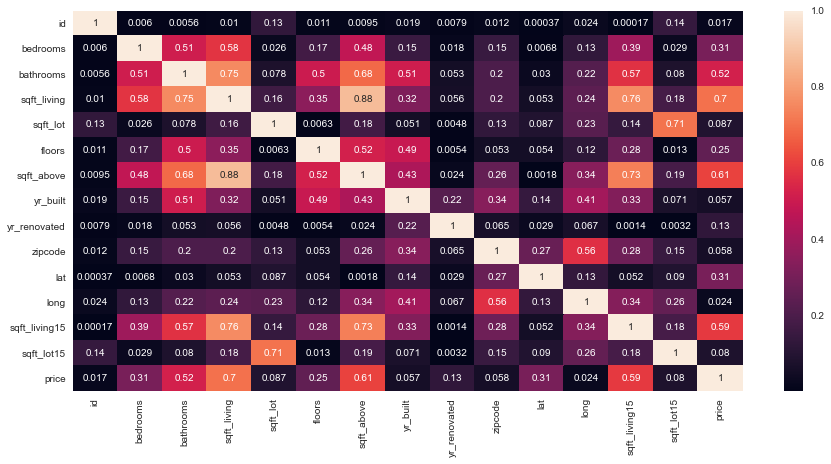

In [3]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(training_data.corr().abs(), annot = True, ax = ax);

<AxesSubplot:>

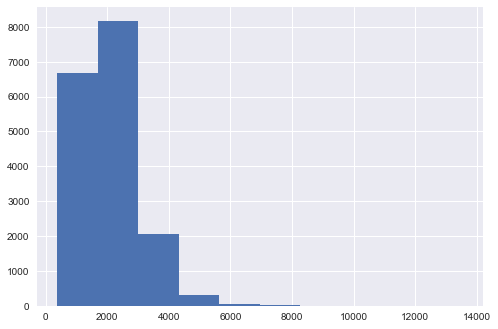

In [4]:
training_data['sqft_living'].hist()

<AxesSubplot:>

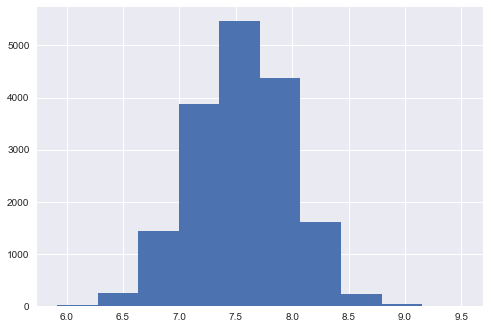

In [5]:
np.log(training_data['sqft_living']).hist()

<AxesSubplot:>

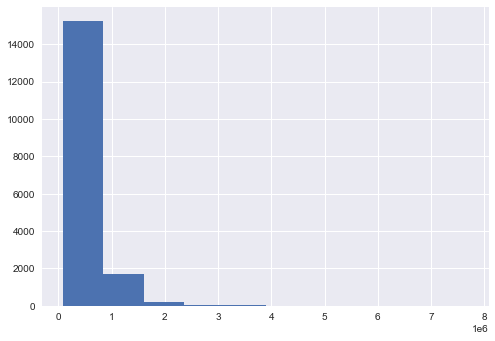

In [6]:
training_data['price'].hist()

<AxesSubplot:>

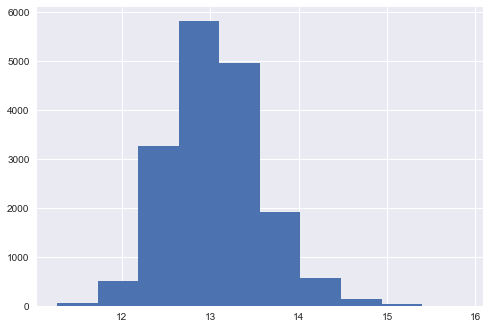

In [7]:
np.log(training_data['price']).hist()

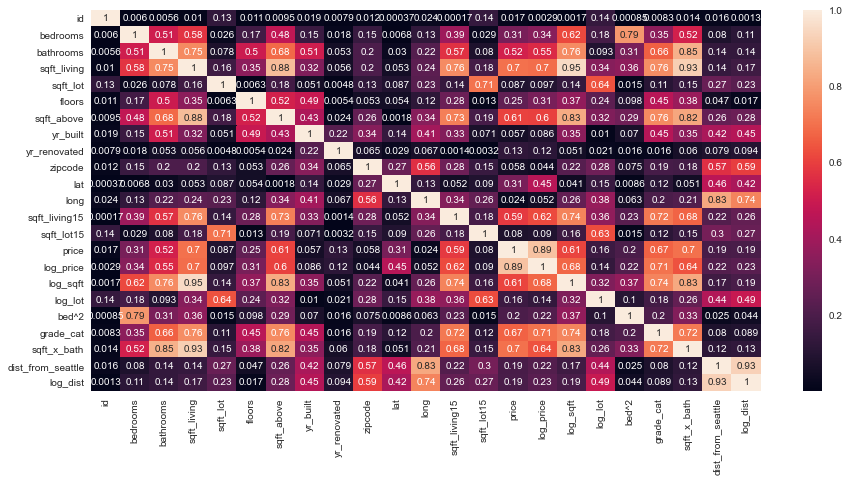

In [8]:
feature_testing = training_data.copy()

fig,ax = plt.subplots(figsize = (15,7))

def custom_transformations(df):
    df['grade_cat'] = df['grade'].str.split().str[0].astype(int)
    df['dist_from_seattle'] = np.sqrt( (df['lat'] - 47.6050) ** 2 + (df['long'] + 122.3344) ** 2)
    df['log_sqft'] = np.log(df['sqft_living'])
    df['log_dist'] = np.log(df['dist_from_seattle'])
#log X,y
feature_testing['log_price'] = np.log(feature_testing['price'])
feature_testing['log_sqft'] = np.log(feature_testing['sqft_living'])
feature_testing['log_lot'] = np.log(feature_testing['sqft_lot'])


feature_testing['bed^2'] = feature_testing['bedrooms'] ** 2
feature_testing['grade_cat'] = feature_testing['grade'].str.split().str[0].astype(int)


feature_testing['sqft_x_bath'] = feature_testing['sqft_living'] * feature_testing['bathrooms']

feature_testing['dist_from_seattle'] = np.sqrt( (feature_testing['lat'] - 47.6050) ** 2 + (feature_testing['long'] + 122.3344) ** 2)
feature_testing['log_dist'] = np.log(feature_testing['dist_from_seattle'])

ax = sns.heatmap(feature_testing.corr().abs(), annot = True, ax = ax);

In [9]:
pairs_df = feature_testing.drop(columns = 'price', axis = 1).corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['Pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['Pairs'], inplace = True)
pairs_df.drop(columns = ['level_0', 'level_1'], inplace = True)
pairs_df.columns = ['CC']
pairs_df.drop_duplicates(inplace = True)
pairs_df[(pairs_df.CC > 0.6) & (pairs_df.CC < 1)]

,CC
Pairs,
"(sqft_living, log_sqft)",0.954630
"(log_dist, dist_from_seattle)",0.932717
"(sqft_x_bath, sqft_living)",0.925442
"(sqft_living, sqft_above)",0.876581
"(bathrooms, sqft_x_bath)",0.850865
"(sqft_above, log_sqft)",0.832160
"(sqft_x_bath, log_sqft)",0.828238
"(long, dist_from_seattle)",0.827774
"(sqft_above, sqft_x_bath)",0.823191


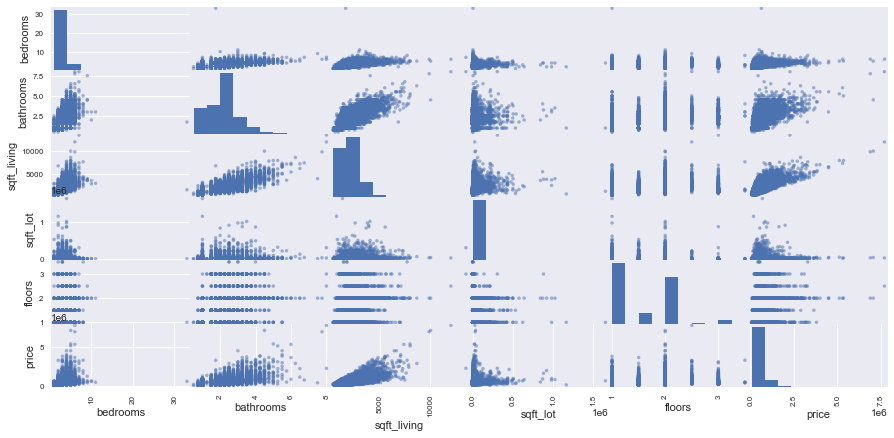

In [10]:
pd.plotting.scatter_matrix(feature_testing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']], figsize = (15,7));

# Baseline

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dummy_regr = DummyRegressor(strategy="mean")

X = training_data['bathrooms'].values.reshape(-1,1)
y = y_train

dummy_regr.fit(X, y)
print(dummy_regr.score(X, y))

predicted_y = dummy_regr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.0
365096.3159346982


# Sqft only

In [12]:
X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.48905333417780206
260972.7941323621


In [13]:
import statsmodels.api as sm

X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

results = sm.OLS(y, sm.add_constant(X)).fit()

results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:            -2.4000e+05
No. Observations:               17277   AIC:                         4.800e+05
Df Residuals:                   17275   BIC:                         4.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.033e+04   4928.407     -8.183      0.000      -5e+04   -3.07e+04
x1           278.7644      2.168    128.588      0.000     274.515     283.014
==============================================================================
Omnibus:                    12398.647   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538198.316
Skew:                           2.963   Prob(JB):                         0.00
Kurtosis:                      29.693   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X = training_data[['sqft_living','bathrooms']]
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4891158439794627
260956.82978845836


# Log sqft (worse)

In [15]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.3732742958214106
289032.1837334627


# Log price (worse)

In [16]:
X = feature_testing['sqft_living'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.48328903767942966
0.37724887544263397


# Log sqft log price (worse)

In [17]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.45736395457648915
0.3865969608964922


# Sqft X Bath (better)

In [18]:
X = feature_testing['sqft_x_bath'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

print(np.linalg.cond(X))

0.4927610800290375
260024.17985231723
1.0


# Bed ^2 (worse)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

X = feature_testing['bedrooms'].values.reshape(-1,1)
y = feature_testing['price']

poly = PolynomialFeatures(2)
poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.09402945158563836
347507.74679006095


# sqft X bath + log_lot (slightly better)

In [20]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train



lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4931935078765455
259913.31920392046


# Polynomial

In [21]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train

new_x = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(new_x, y)

print(lr.score(new_x,y))

predicted_y = lr.predict(new_x)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.49448635797945206
259581.59147277297


# Distance from seattle added to polynomial

R^2:  0.6228837962068232
Adjusted R^2 : 0.6226653807059583
RMSE:  224204.87288975832
Median Error:  17039.094740338624


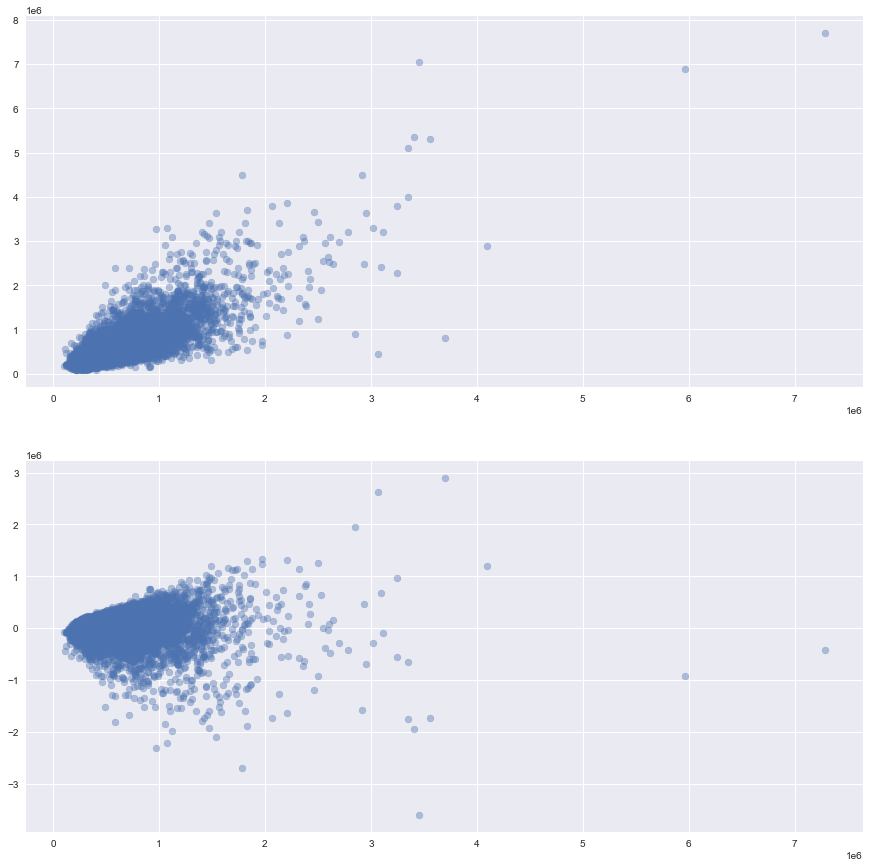

In [22]:
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']]
y = y_train

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))
predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

#print(np.linalg.cond(X))

fig, axs = plt.subplots(2, figsize = (15,15));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

# Tried OHE with waterfront

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse = False)
cat_X = ohe.fit_transform(feature_testing['waterfront'].values.reshape(-1,1))
cat_df = pd.DataFrame(data = cat_X)
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']].copy()
X['waterfront'] = cat_df.values
y = y_train



#poly = PolynomialFeatures(3)
#X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.6085356342271491
228430.22538337778


# Ordinal Encoder

In [24]:
from sklearn.preprocessing import OrdinalEncoder

x_enc = feature_testing['grade']

x_enc = x_enc.str.split().str[0]

enc = OrdinalEncoder()

test = enc.fit_transform(X)


R^2:  0.7069148001408774
Adjusted R^2 : 0.7059616775397095
RMSE:  0.2841195120691175
Median Error:  -0.0070473622097093624
Condition Number:  3975167655443650.5
RMSE $: 106916.80027912848


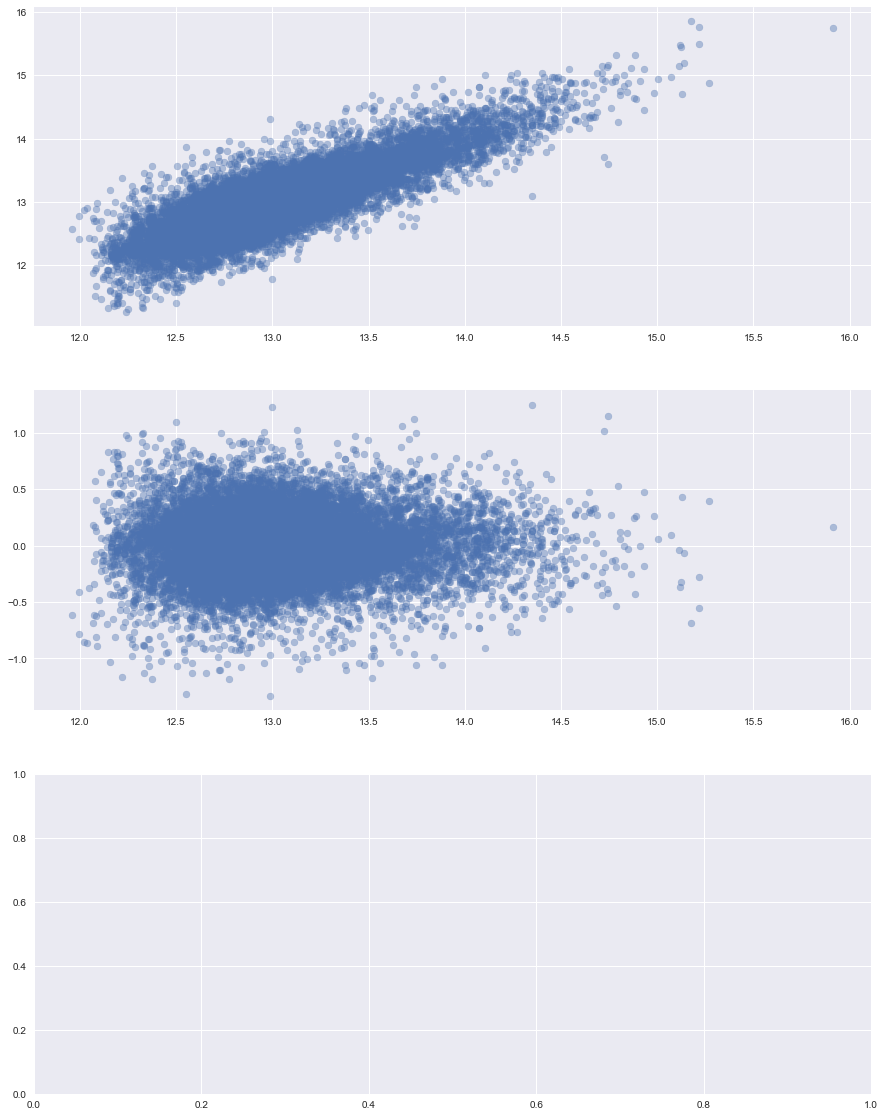

In [37]:
X = feature_testing[['log_sqft','bathrooms','log_dist','yr_built','grade_cat']]

y = np.log(y_train)

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

print('Condition Number: ',np.linalg.cond(X))

fig, axs = plt.subplots(3, figsize = (15,20));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#sns.heatmap(pd.concat([y_train, X_pre], axis = 1).corr().abs(), annot = True, ax = axs[2]);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

print('RMSE $:', y_test.std()*rmse)

# Cross-Validations

In [34]:


scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 10)
lr_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
display_scores(lr_scores)

Scores: [0.28117594 0.29592953 0.29271154 0.28136768 0.27973191 0.28191916
 0.29290005 0.28888568 0.28271343 0.28077682]
Mean: 0.2858111721036088
Standard Deviation: 0.005813577072570939


# Test Predictions

In [26]:
custom_transformations(test_data)

In [38]:
X_test_data = test_data[['log_sqft','bathrooms','log_dist','yr_built','grade_cat']]
y_test_data = np.log(y_test)


X_test_data = poly.transform(X_test_data)

test_predictions = lr.predict(X_test_data)
print('Adjusted R^2 :', 1 - ( 1-lr.score(X_test_data, y_test_data) ) * ( len(y_test_data) - 1 ) / ( len(y_test_data) - X_test_data.shape[1] - 1 ))
rmse = np.sqrt(mean_squared_error(test_predictions,y_test_data))
print('RMSE: ',rmse)
print("Median Error: ", np.median(test_predictions - y_test_data))
print('RMSE $:', y_test.std()*rmse)

Adjusted R^2 : 0.700939712385398
RMSE:  0.28980313349351366
Median Error:  -0.0071294819376985785
RMSE $: 109055.59959026665


<AxesSubplot:xlabel='yr_built', ylabel='price'>

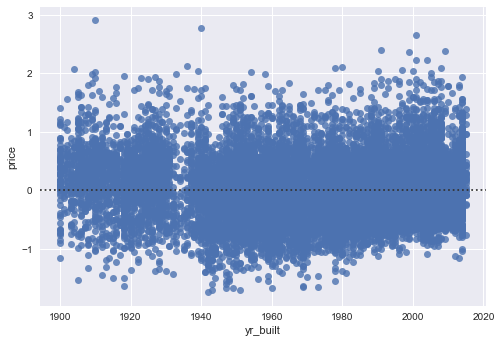

In [32]:
sns.residplot(x=feature_testing['yr_built'], y=np.log(feature_testing['price']))

<AxesSubplot:xlabel='dist_from_seattle', ylabel='price'>

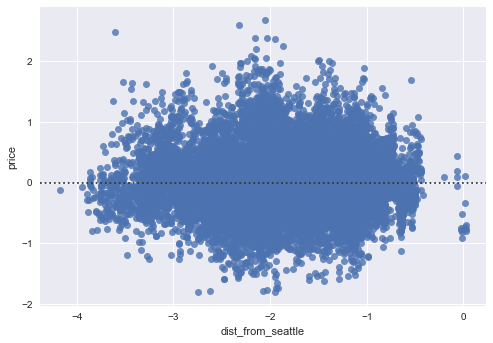

In [33]:
sns.residplot(x=np.log(feature_testing['dist_from_seattle']), y=np.log(feature_testing['price']))